# Data Wrangling of 'WeRateDogs' Twitter data

Hi , In this notebook we will gather, assess and analyze 'WeRateDogs' Twitter data.


## Step 1 : Gathering data
First, load 'Enhanced Twitter Archive' file

In [172]:
import numpy as np
import pandas as pd
archive_df = pd.read_csv("twitter-archive-enhanced.csv")
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


Now, 'image predictions' file:

In [237]:
# make request to get data from the server
import requests
import pandas as pd
import io
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
urlData = requests.get(url).content
# store data into df
predictions_df = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep='\t')
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [174]:
# save into file
with open ('image_predictions.tsv','wb') as file:
    file.write(urlData)

Now, we will query Twitter Api:

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Next, load tweet json data :

In [175]:
# read json data tweet by tweet
import json
json_list = []
with open('tweet-json.txt') as json_file: 
    for i in json_file:
        tweet = json.loads(i)
        json_list.append(tweet)
json_file.close()
# new df, map each desired tweet attribute to corresponding column 
json_df = pd.DataFrame()
json_df['tweet_id'] = list(map(lambda i: i['id'], json_list))
json_df['retweet_count'] = list(map(lambda i: i['retweet_count'], json_list))
json_df['favorite_count'] = list(map(lambda i: i['favorite_count'], json_list))
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Step 2 : Assessing data
we will assess data visually and programmatically for quality and tidiness issues. 

In [176]:
# view json_df to look for issues
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [177]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [178]:
json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


everything looks ok 

In [179]:
# view predictions_df to look for issues
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [180]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [181]:
predictions_df.jpg_url.duplicated().any()

True

In [182]:
predictions_df[predictions_df.jpg_url.duplicated()==True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


There's one quality issue in predictions_df:

(1) 'jpg_url' column : has 66 dublicated values 

I check if this issue still exist after I merge the datasets.

In [183]:
predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


everything looks ok 

In [184]:
# view archive_df to look for issues
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [185]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There's multiple quality issues in archive_df:

(1) 'source' columns : there is tags and unnessesary url, can be converted to : 'iPhone', 'Web client','Vine', 'TwitterDeck'

(2) There is rows that represent retweets and replies. We only want original tweets so they need to be removed.

(3) 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp' columns : a lot of missing values. No need for those columns since we only want original tweets.

(4) 'rating_denominator': there are some values other than 10, some tweets contain more than one dog. it is better if all ratings are of 10.

(5) 'rating numerator': in row (47) is 5 while in tweet it is 13.5, this need to be corrected.

(6) 'name' column: some values are incorrect. It seem to be extraction issue. For example, row (58) dog name is 'a'.

(7) 'name' column: missing values are denoted 'None'. It should be NaN to identify it as missing.

(8) 'rating_numerator', 'rating_denominator' need to be converted to float64 to account for decimals.

(9) 'expanded_urls' column : 59 missing values.

(10) 'timestamp' column : need to be converted to 'datetime' type

(11) There is outliers in 'rating numerator' : for example 1775

For tidyness issues :

(1) in predictions_df we need to summrize the dog preed prediction into one column instead of  p1, p2, p3

(2) in 'archive_df' dog stage information is found over 4 columns. It needs to me merged into one column named 'dog_stage'

(3) 3 dataset need to be merged into one dataframe by 'tweet_id'


## Step 3 : Cleaning data
Let's clean the dataset based on issues mentioned in the assessing section.

First, we will clean each one of the datasets then merge the datasets.

In [186]:
# make copies of each data frame
archive_df_clean = archive_df.copy()
predictions_df_clean = predictions_df.copy()
json_df_clean = json_df.copy()

### Define

(1) archive_df 'source' column : there is tags and unnessesary url, can be converted to : 'iPhone', 'Web client','Vine', 'TwitterDeck'

### Code

In [187]:
# map them to new labels
archive_df_clean.loc[archive_df_clean['source'].str.contains('iPhone'), 'source'] = 'iPhone'
archive_df_clean.loc[archive_df_clean['source'].str.contains('Web Client'), 'source'] = 'Web Client'
archive_df_clean.loc[archive_df_clean['source'].str.contains('Vine'), 'source'] = 'Vine'
archive_df_clean.loc[archive_df_clean['source'].str.contains('TweetDeck'), 'source'] = 'TweetDeck'

### Test

In [188]:
archive_df_clean.source.value_counts()

iPhone        2221
Vine            91
Web Client      33
TweetDeck       11
Name: source, dtype: int64

### Define

(2) in archive_df there is rows that represent retweets and replies. 
We only want original tweets so they need to be removed.

### Code

In [189]:
drop_Idx = set(archive_df_clean[(archive_df_clean['retweeted_status_id'].notnull()) 
                                | (archive_df_clean['in_reply_to_status_id'].notnull())].index) 
new_Idx = list(set(archive_df_clean.index) - set(drop_Idx))
archive_df_clean = archive_df_clean.iloc[new_Idx]

### Test

In [190]:
archive_df_clean.retweeted_status_id.notnull().any()

False

In [191]:
archive_df_clean.in_reply_to_status_id.notnull().any()

False

### Define

(3) in archive_df 'retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_timestamp' columns : a lot of missing values. 
 No need for those columns since we only want original tweets.

### Code

In [192]:
# we will drop those columns 
archive_df_clean = archive_df_clean.drop(['retweeted_status_id',
                              'retweeted_status_user_id',
                              'in_reply_to_status_id', 
                              'in_reply_to_user_id',
                              'retweeted_status_timestamp'], axis = 1)

### Test

In [193]:
archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define

(8) in archive_df rating_numerator', 'rating_denominator' need to be converted to float64 to
 account for decimals.

### Code

In [194]:
archive_df_clean['rating_numerator'] = archive_df_clean['rating_numerator'].astype('float64') 
archive_df_clean['rating_denominator'] = archive_df_clean['rating_denominator'].astype('float64') 

### Test

In [195]:
archive_df_clean.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator      float64
rating_denominator    float64
name                   object
doggo                  object
floofer                object
pupper                 object
puppo                  object
dtype: object

### Define

(4) in archive_df 'rating_denominator': there are some values other than 10, some tweets contain more
than one dog. it is better if all ratings are of 10.

### Code

In [196]:
# we will take closer look to deal with those values
pd.set_option('display.max_colwidth', 240)
archive_df_clean[archive_df_clean['rating_denominator'] != 10].loc[:, ['text',
                                                           'rating_numerator',
                                                           'rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


In [197]:
# we will manually fix incorrect values
# row 516 does not have rating
archive_df_clean.drop([516], inplace = True)

In [198]:
archive_df_clean.loc[archive_df_clean.index == 2335, 'rating_numerator'] = 9
archive_df_clean.loc[archive_df_clean.index == 2335, 'rating_denominator'] = 10

In [199]:
archive_df_clean.loc[archive_df_clean.index == 1662, 'rating_numerator'] = 10
archive_df_clean.loc[archive_df_clean.index == 1662, 'rating_denominator'] = 10

In [200]:
archive_df_clean.loc[archive_df_clean.index == 1202, 'rating_numerator'] = 11
archive_df_clean.loc[archive_df_clean.index == 1202, 'rating_denominator'] = 10

In [201]:
archive_df_clean.loc[archive_df_clean.index == 1165, 'rating_numerator'] = 13
archive_df_clean.loc[archive_df_clean.index == 1165, 'rating_denominator'] = 10

In [202]:
archive_df_clean.loc[archive_df_clean.index == 1068, 'rating_numerator'] = 14
archive_df_clean.loc[archive_df_clean.index == 1068, 'rating_denominator'] = 10

In [203]:
# all the rest are ratings of multiple dogs, so I decided to drop them 
# and keep only individual dog ratings
archive_df_clean = archive_df_clean[(archive_df_clean['rating_denominator'] == 10)]

### Test

In [204]:
archive_df_clean[archive_df_clean['rating_denominator'] != 10].loc[:, ['text',
                                                           'rating_numerator',
                                                           'rating_denominator']]

,text,rating_numerator,rating_denominator


In [205]:
# we will drop 'rating_denominator' since there is no need for it
archive_df_clean = archive_df_clean.drop(['rating_denominator'],axis=1)

### Define

(5) in archive_df 'rating numerator': in row (45) is 5 while in tweet it is 13.5, 
 this need to be corrected.

### Code

In [206]:
archive_df_clean.loc[archive_df_clean.index == 45, 'rating_numerator'] = 13.5

### Test

In [207]:
archive_df_clean.loc[archive_df_clean.index == 45,] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19 +0000,iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,Bella,None,None,None,None


### Define

(6) in archive_df 'name' column: some values are incorrect. 
 It seem to be extraction issue. For example, row (58) dog name is 'a'.

### Code

In [208]:
# (6) 'name' column: some values are incorrect. 
# It seem to be extraction issue. For example, row (58) dog name is 'a'.
archive_df_clean['name'] = archive_df_clean['name'].replace('a', np.NaN)
archive_df_clean['name'] = archive_df_clean['name'].replace('one', np.NaN)
archive_df_clean['name'] = archive_df_clean['name'].replace('an', np.NaN)
archive_df_clean['name'] = archive_df_clean['name'].replace('the', np.NaN)
archive_df_clean['name'] = archive_df_clean['name'].replace('by', np.NaN)
archive_df_clean['name'] = archive_df_clean['name'].replace('acually', np.NaN)
archive_df_clean['name'] = archive_df_clean['name'].replace('not', np.NaN)
archive_df_clean['name'] = archive_df_clean['name'].replace('his', np.NaN)
archive_df_clean['name'] = archive_df_clean['name'].replace('my', np.NaN)

### Test

In [209]:
archive_df_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
31       Waffles
          ...   
2326       quite
2327         NaN
2328        None
2329        None
2330        None
2331        None
2332        None
2333         NaN
2334         NaN
2335         NaN
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351        None
2352         NaN
2353         N

### Define

(7) in archive_df 'name' column: missing values are denoted 'None'. 
 It should be NaN to identify it as missing.

### Code

In [210]:
archive_df_clean['name'] = archive_df_clean['name'].replace('None', np.NaN)

In [211]:
archive_df_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          such
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
31       Waffles
          ...   
2326       quite
2327         NaN
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333         NaN
2334         NaN
2335         NaN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351         NaN
2352         NaN
2353         N

### Define

(9) in archive_df 'expanded_urls' columns : 59 missing values.

### Code

In [212]:
archive_df_clean['expanded_urls'].isnull().sum()

3

In [213]:
# Now we have only three, we will drop these
archive_df_clean = archive_df_clean[archive_df_clean['expanded_urls'].notnull()]

### Test

In [214]:
archive_df_clean['expanded_urls'].isnull().any()

False

### Define

(10) in archive_df 'timestamp' column : need to be converted to 'datetime' type

### Code

In [215]:
# lets convert its type
archive_df_clean['timestamp'] =  pd.to_datetime(archive_df_clean['timestamp'])

### Test

In [216]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id            2082 non-null int64
timestamp           2082 non-null datetime64[ns]
source              2082 non-null object
text                2082 non-null object
expanded_urls       2082 non-null object
rating_numerator    2082 non-null float64
name                1414 non-null object
doggo               2082 non-null object
floofer             2082 non-null object
pupper              2082 non-null object
puppo               2082 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 195.2+ KB


### Define

(11) in archive_df there is outliers in 'rating numerator' : for example 1776, 420 we need fix these outliers

### Code

In [217]:
# I picked a better name for 'rating_numerator'
archive_df_clean = archive_df_clean.rename(columns={'rating_numerator': 'rating_of_10'})

In [218]:
# we will fix these outliers
archive_df_clean[archive_df_clean.rating_of_10 >20]

,tweet_id,timestamp,source,text,expanded_urls,rating_of_10,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56,iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,Sophie,None,None,pupper,None
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,Atticus,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00,iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,NaN,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33,iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,NaN,None,None,None,None


In [219]:
archive_df_clean.loc[archive_df_clean.index == 695, 'rating_of_10'] = 9.75
archive_df_clean.loc[archive_df_clean.index == 763, 'rating_of_10'] = 11.27
archive_df_clean.loc[archive_df_clean.index == 1712, 'rating_of_10'] = 11.26
archive_df_clean.drop([2074,979], inplace = True)

### Test

In [220]:
archive_df_clean[archive_df_clean.rating_of_10 >20]

,tweet_id,timestamp,source,text,expanded_urls,rating_of_10,name,doggo,floofer,pupper,puppo


### Fix tidyness issue:

### Define

(2) in 'archive_df' dog stage information is found over 4 columns. It needs to me merged into one column named 'dog_stage'

### Code

In [221]:
# some tweets has more than one stage
archive_df_clean.loc[(archive_df_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_of_10,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02,iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13.0,NaN,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26,iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,NaN,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28,iPhone,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13.0,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28,iPhone,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12.0,NaN,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25,iPhone,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12.0,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48,iPhone,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10.0,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20,Vine,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12.0,NaN,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42,iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47,iPhone,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,NaN,doggo,None,pupper,None
1063,741067306818797568,2016-06-10 00:39:48,iPhone,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12.0,just,doggo,None,pupper,None


In [222]:
# let's create new column named 'dog_stage' and extract stage value from the tweet text to it
archive_df_clean['dog_stage'] = archive_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
# handle multible stages
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [223]:
# drop extra columns
archive_df_clean = archive_df_clean.drop(['doggo',
                              'floofer',
                              'pupper', 
                              'puppo'], axis = 1)

### Test 

In [224]:
archive_df_clean.dog_stage.value_counts()

pupper     234
doggo       79
puppo       29
floofer      4
Name: dog_stage, dtype: int64

### Define

(1) in predictions_df we need to summrize the dog preed prediction into one column instead of  p1, p2, p3

### Code

In [225]:
predictions_df_clean['dog_breed_prediction'] = np.NaN
predictions_df_clean['dog_breed_prediction'] = np.where(predictions_df_clean['p1_dog']==True,
                                  predictions_df_clean['p1'], np.NaN)
predictions_df_clean['dog_breed_prediction'] = np.where((predictions_df_clean['p1_dog']==False) &
                                                  (predictions_df_clean['p2_dog']==True),
                                  predictions_df['p2'], predictions_df_clean['dog_breed_prediction'])
predictions_df_clean['dog_breed_prediction'] = np.where((predictions_df_clean['p1_dog']==False) &
                                                  (predictions_df_clean['p2_dog']==False) &
                                                  (predictions_df_clean['p3_dog']==True),
                                  predictions_df_clean['p3'], predictions_df_clean['dog_breed_prediction'])

In [231]:
# we will drop predictions columns we do not need 
predictions_df_clean = predictions_df_clean.drop(['p1','p2','p3',
                              'p1_conf','p2_conf','p3_conf',
                              'p1_dog','p2_dog','p3_dog'], axis = 1)

### Test

In [232]:
predictions_df_clean.head(30)

,tweet_id,jpg_url,img_num,dog_breed_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle


### Define

(3) 3 dataset need to be merged into one dataframe by 'tweet_id'

### Code

In [233]:
final_df = pd.merge(archive_df_clean, predictions_df_clean, on='tweet_id')
final_df = pd.merge(final_df, json_df_clean, on='tweet_id')

### Test

In [234]:
final_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_of_10,name,dog_stage,jpg_url,img_num,dog_breed_prediction,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048


### Define

(1) predictions_df 'jpg_url' column : has 66 dublicated values 

### let's check for if the issue still exist

### Test 

In [235]:
final_df.jpg_url.duplicated().any()

False

## Step 4 : Storing, Analyzing, and Visualizing Data

Since we are done with the cleaning let's save the cleaned file into 'twitter_archive_master.csv' :

In [236]:
final_df.to_csv('twitter_archive_master.csv', sep=',', encoding='utf-8')

Based in our wrangling work that we have done ( assessing and cleaning the data), let's analyze the dataset and make some insights from the data.

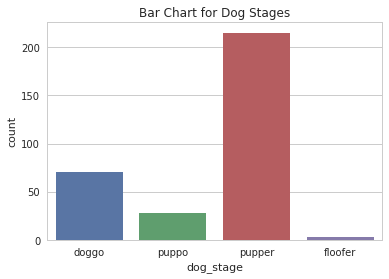

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# plot par chart for dog stages
sns.countplot(final_df['dog_stage'])
fig = plt.gcf()
plt.title("Bar Chart for Dog Stages")
plt.show() 

Insight (1): 

As we can see above, ‘Pupper’ is the most frequent stage of dog with a count of >200. While other stages are not mentioned that much in tweets. ‘Doggo’ stage of dog comes next, while flooder is the least mentioned stage with a count that is less than 10.

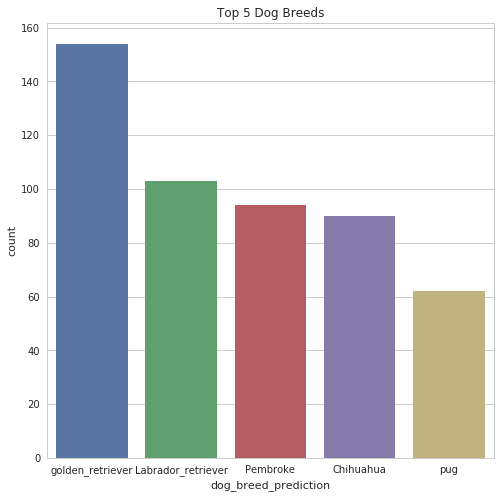

In [240]:
# plot par chart for dog breeds
plt.figure(figsize=(8,8))
sns.countplot(final_df['dog_breed_prediction'], 
                   order=pd.value_counts(final_df['dog_breed_prediction']).iloc[:5].index)
plt.title("Top 5 Dog Breeds")
plt.show() 

Insight (2): 

As we can see above, 'Golden Retriver' is the most frequent dog breed predicted by Neural Network with a count of more than 150, followed by 'Labrador Retriver', 'Pembroke', 'Chihuahua' and ‘pug’ breeds.

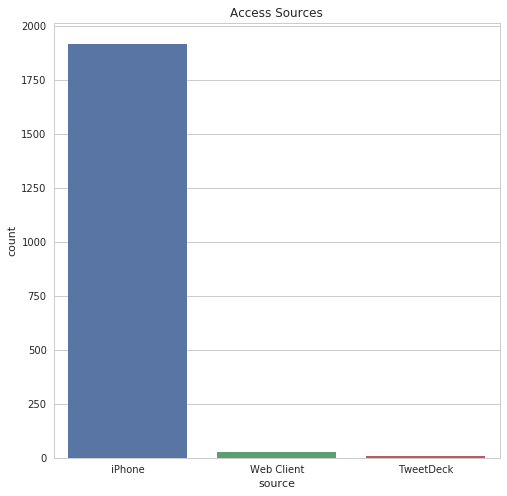

In [241]:
# plot par chart for access source
plt.figure(figsize=(8,8))
sns.countplot(final_df['source'])
plt.title("Access Sources")
plt.show() 

In [242]:
final_df['source'].value_counts(normalize=True)

iPhone        0.980583
Web Client    0.014308
TweetDeck     0.005110
Name: source, dtype: float64

Insight (3): 

Counting the proportions of each source, I got that 98% of tweets were written from an iPhone :) while 2% of tweets came from Web client or TweetDeck.

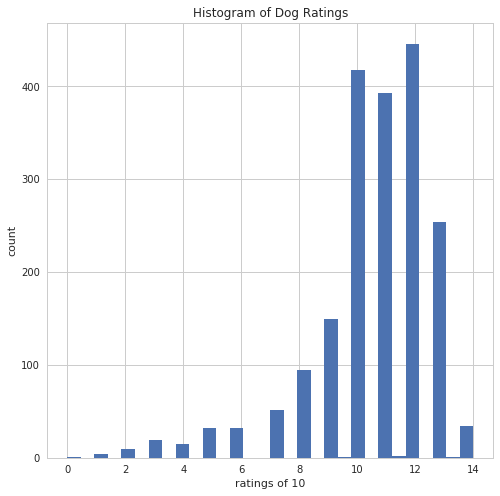

In [243]:
# plot histogram of dog ratings
plt.figure(figsize=(8,8))
plt.hist(final_df['rating_of_10'], bins=30)
plt.xlabel('ratings of 10')
plt.ylabel('count')
plt.title('Histogram of Dog Ratings')
plt.show()

In [244]:
final_df['rating_of_10'].describe()

count    1957.000000
mean       10.545110
std         2.170282
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_of_10, dtype: float64

Insight (4): 

More than 400 dogs were rated 12/10. Also by looking at 25% and 75% quartiles, most of dogs have been given ratings between 10 and 12. However, no ratings of more than 14 existed.

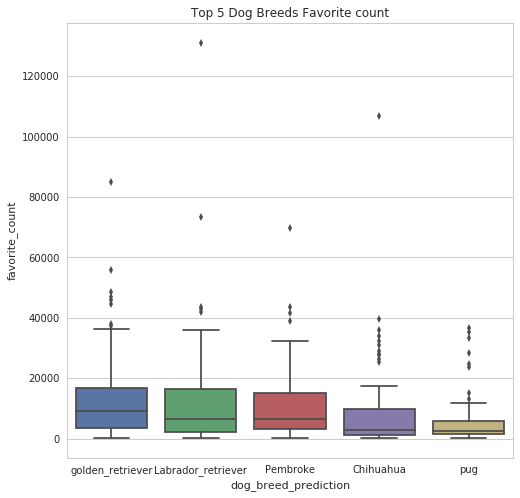

In [245]:
# box plot for dog_breed_prediction favorite count
plt.figure(figsize=(8,8))
sns.boxplot(final_df['dog_breed_prediction'], final_df['favorite_count'],
                   order=pd.value_counts(final_df['dog_breed_prediction']).iloc[:5].index)
plt.title("Top 5 Dog Breeds Favorite count")
plt.show() 

Insight (5):

We see from the box plot above, that favorite count for tweets mostly is below 20000 favorites. However we see some outliers. For example one  tweet with “Labrador_retriever” as breed prediction for dog image got more than 120000 favorite hits! Also, we see multiple “golden  retriever” dogs got more than 40000 favorites. In conclusion, we can say that “Labrador_retriever” got higher favorite count in general.

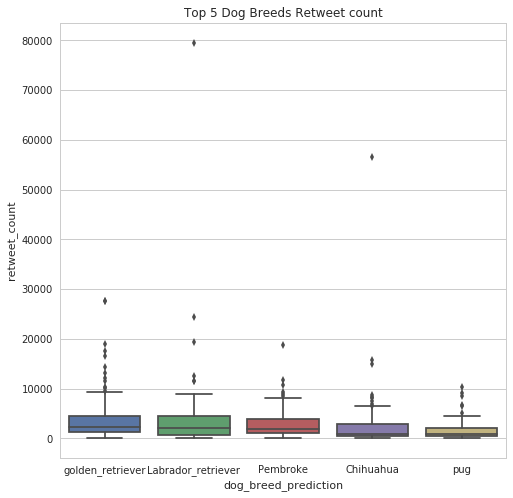

In [246]:
# box plot for dog_breed_prediction retweet count
plt.figure(figsize=(8,8))
sns.boxplot(final_df['dog_breed_prediction'], final_df['retweet_count'],
                   order=pd.value_counts(final_df['dog_breed_prediction']).iloc[:5].index)
plt.title("Top 5 Dog Breeds Retweet count")
plt.show() 

Insight (6):

The box plot above shows retweet counts for most predicted breeds of dog image. Box plots are good for detecting outliers. We see in the plot that one  tweet with “Labrador_retriever” dog got almost 80000 retweet hits! This is most likely the same “Labrador_retriever” tweet that got more than 120000 favorite hits is the previous plot. We can see that different breeds have similar retweet count and there’s no noticeable difference between them.

We notice the difference between this plot and the previous one. The retweet counts are generally much less than favorite counts.